In [1]:
import numpy as np
import sys
import logging
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import corner

sys.path.append("..")

from simulator.spherical_simulator import simulator, true_logp

## Setup

In [2]:
latent_dim = 1
data_dim = 2
n = 100
epsilon = 0.01

phases = np.random.uniform(low=0., high=2.*np.pi, size=latent_dim)
widths = np.random.uniform(low=1., high=2., size=latent_dim)

## Generate data

In [4]:
x = simulator(epsilon, latent_dim, data_dim, n, phases, widths)

In [6]:
res = 251
x_range = np.linspace(-2.,2.,res)
y_range = np.linspace(-2.,2.,res)
xx, yy = np.meshgrid(x_range, y_range)
x_grid = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
logp_grid = true_logp(x_grid, epsilon, latent_dim, phases, widths).reshape((res, res))
logp_grid[~np.isfinite(logp_grid)] = -1000000.

../simulator/spherical_simulator.py:52: RuntimeWarning: invalid value encountered in true_divide
  z_phi[:,i] = np.arccos( x[:,i] / np.sum(x[:,i:latent_dim+1]**2, axis=1)**0.5)
../simulator/spherical_simulator.py:52: RuntimeWarning: invalid value encountered in arccos
  z_phi[:,i] = np.arccos( x[:,i] / np.sum(x[:,i:latent_dim+1]**2, axis=1)**0.5)
/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Users/johannbrehmer/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
../simulator/spherical_simulator.py:67: RuntimeWarning: divide by zero encountered in log
  logp_eps = np.log(norm(loc=0., scale=epsilon).pdf(z_eps))


## Plot

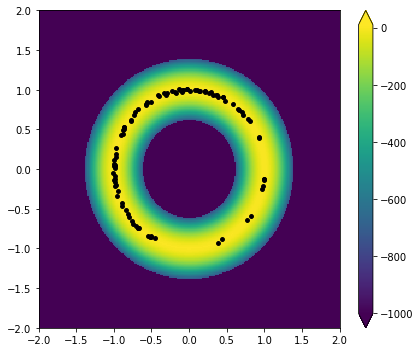

In [8]:
zmin, zmax = -1000., 10.
fig = plt.figure(figsize=(6,5))
ax = plt.gca()

pcm = plt.pcolormesh(
    x_range, y_range,
    np.clip(logp_grid, zmin, zmax),
    cmap="viridis", norm=matplotlib.colors.Normalize(zmin, zmax)
)
plt.colorbar(pcm, extend="both")
plt.scatter(x[:,0], x[:,1], s=15., c="black")

plt.tight_layout()
plt.show()